### Regresión   
La regresión es el proceso de predecir una variable dependiente continua (también llamada variable objetivo, target o salida) a partir de una o más variables independientes (o características, features o explicativas).

La variable dependiente debe ser continua (precio, temperatura, ingresos).
Las variables independientes pueden ser continuas (edad, altura) o categóricas (género, ciudad — codificadas con one-hot encoding).

Se utilizan datos históricos para entrenar un modelo de regresión. Luego el modelo se usa para predecir valores futuros.

Existen dos tipos principales según el número de variables independientes:

- Regresión simple: una sola variable independiente.
- Regresión múltiple: dos o más variables independientes.

Además, la relación entre variables puede ser:

- Lineal → Regresión lineal (simple o múltiple).
- No lineal → Regresión polinómica, SVR, árboles de decisión, redes neuronales, etc. (no entra en el curso).

### Regresión lineal
La regresión lineal es un método estadístico que modela la relación entre una variable dependiente (Y) y una o más variables independientes (X).

Tipos: 

- Simple: Es cuando se utiliza una sóla variable independiente para estimar una variable dependiente.
- Múltiple: Cuando hay más de una variable preditora o independiente presente.


##### Diagrama
En la regresión lineal, el diagrama más común y útil para visualizar la relación entre las variables es el diagrama de dispersión (scatter plot).

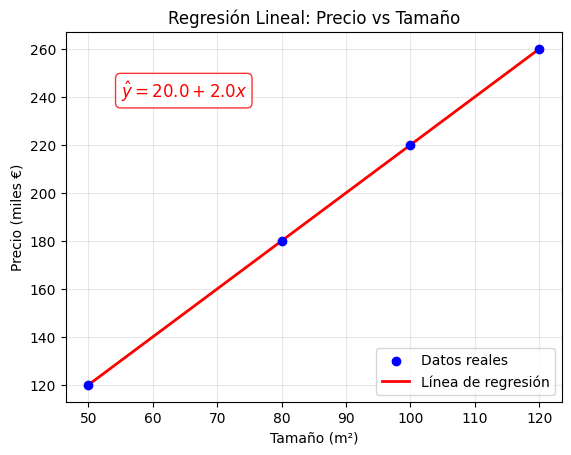

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Datos
X_independiente = np.array([[50], [80], [100], [120]])
y_dependiente = np.array([120, 180, 220, 260])

# Modelo
modelo = LinearRegression()
modelo.fit(X_independiente, y_dependiente)

# Predicciones
y_pred = modelo.predict(X_independiente)

# Parámetros
b0 = modelo.intercept_
b1 = modelo.coef_[0]
mse = mean_squared_error(y_dependiente, y_pred)

# Ecuación como texto
ecuacion = f'$\\hat{{y}} = {b0:.1f} + {b1:.1f}x$'

# Gráfico
plt.scatter(X_independiente, y_dependiente, color='blue', label='Datos reales', zorder=5)
plt.plot(X_independiente, y_pred, color='red', label='Línea de regresión', linewidth=2)

# Líneas de error (opcional)
for i in range(len(X_independiente)):
    plt.vlines(X_independiente[i], y_dependiente[i], y_pred[i], color='gray', linestyle='--', alpha=0.7)

# Añadir la ECUACIÓN en el gráfico
plt.text(55, 240, ecuacion, fontsize=12, color='red', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="red", alpha=0.8))

# Títulos y etiquetas
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Regresión Lineal: Precio vs Tamaño')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


El conjunto de datos (serie o series) con el que creamos el modelo permiten crear la ecuación del modelo que nos permitirá predecir valores de la variable dependiente.

In [2]:
y_nuevo = modelo.predict([[110]])
print(f" {y_nuevo[0]}")

 239.99999999999997


### Error residual
El error residual es cuánto se equivoca el modelo al predecir un valor de la variable dependiente, cuando tú conoces el valor real y puedes compararlos. Podemos decir que el error es la distancia desde el punto de datos hasta la línea de regresión ajustada. 

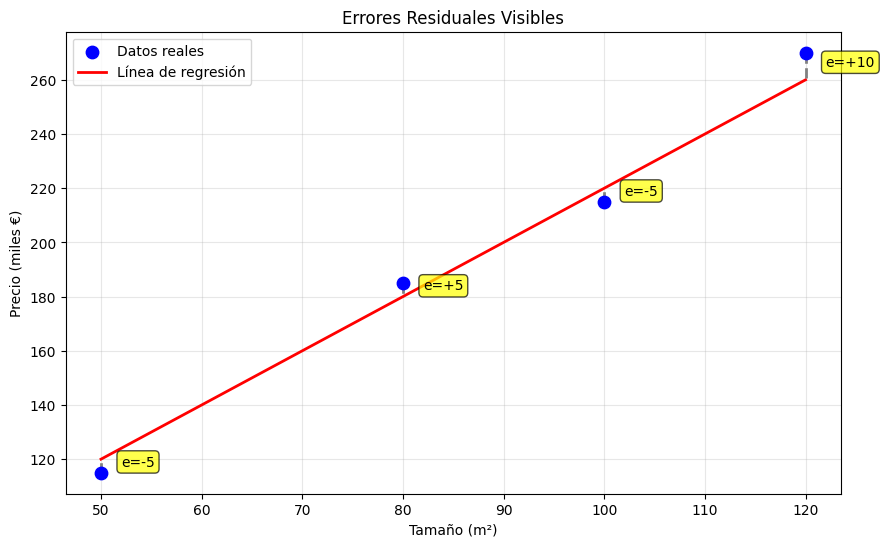

In [3]:
import matplotlib.pyplot as plt

# Datos reales (con ruido)
X = [50, 80, 100, 120]
y = [115, 185, 215, 270]        # ← ¡Precios reales con variación!
y_pred = [120, 180, 220, 260]   # ← Modelo: ŷ = 20 + 2x

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales', s=80, zorder=5)
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')

# ERRORES VISIBLES
for i in range(len(X)):
    error = y[i] - y_pred[i]
    plt.vlines(X[i], y[i], y_pred[i], color='gray', linestyle='--', linewidth=2)
    plt.text(X[i]+2, (y[i] + y_pred[i])/2, f'e={error:+.0f}', color='black', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Errores Residuales Visibles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()